# 1. 작업 1유형

### 1-1. 국어,수학,영어,과학 과목 중 가장 많은 학생들이 응시한 시험을 선택하고 / 해당과목의 점수를 표준화 했을 때 / 가장 큰 표준화 점수를 구하여라

DataUrl = https://raw.githubusercontent.com/Datamanim/datarepo/main/krdatacertificate/e7_p1.csv 

데이터 출처 : 자체 제작 데이터 설명 : 학생 15명의 국어,수학,영어,과학 시험 점수이다. 각 학생은 4과목 중 3과목을 선택해서 시험봤다.

In [2]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/krdatacertificate/e7_p1.csv")

df.head()

,학생,국어,수학,영어,과학
0,ID_0,63.0,NaN,79.0,84.0
1,ID_1,91.0,93.0,NaN,73.0
2,ID_2,59.0,55.0,NaN,56.0
3,ID_3,71.0,83.0,82.0,NaN
4,ID_4,62.0,72.0,56.0,NaN


* Z-Score : 정규화 할 때 nan값 있으면 에러 발생
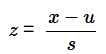

In [24]:
from scipy.stats import zscore

# 1. 국어를 가장 많이 응시한 시험 선택
sub = df.iloc[:,1:].count().idxmax() 

# 2. 정규화 할 때 nan 값 있으면 에러 발생해서 결측치 제거 후 zscore 적용
result = zscore(df[sub].dropna())  

# 3. 정규화 한 값 중 최댓값
result.max()

1.713855688712825

### 1-2. 32개의 변수간 상관관계를 확인 했을 때, / var_11 컬럼과 상관계수의 절댓값이 가장 큰 변수를 찾아 / 해당 변수의 평균값을 구하여라

DataUrl = https://raw.githubusercontent.com/Datamanim/datarepo/main/krdatacertificate/e7_p2_.csv 

데이터 출처 : 자체제작 32개 변수의 수치값

In [26]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/krdatacertificate/e7_p2_.csv')

df.head()

,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,...,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32
0,-0.335864,-2.425701,0.452851,-1.381924,-0.425591,-1.461498,-0.417082,-0.944226,-0.351224,1.474046,...,1.715714,0.300227,0.439828,-0.094772,1.551995,3.308446,-0.391377,1.963829,-1.458605,-0.348652
1,0.803535,-0.699433,0.095579,0.788053,-0.267674,-0.370746,0.636034,-1.674584,-0.058465,-1.188973,...,-1.348879,-0.899480,-1.271886,0.333734,-0.373565,-2.091508,-0.715245,-0.688441,0.910927,-0.746899
2,-0.408470,-0.361105,-0.857278,0.338294,2.317821,-0.099928,0.557053,-0.847932,0.973471,0.101203,...,-0.388353,0.918553,-1.984422,0.385055,1.161414,-1.280253,2.831802,-0.953771,-0.228466,0.766254
3,-0.690599,0.777928,-0.079963,0.164086,1.721702,0.146761,-0.988636,0.885344,0.647053,0.674609,...,0.337074,-1.406224,-0.699728,-0.836068,-0.226315,1.260893,-0.781630,-0.219995,0.871289,0.017578
4,0.179819,-0.668267,0.381849,-0.884196,0.758519,-1.026190,0.986227,-1.663167,2.290551,0.564845,...,-0.700137,-0.153825,-1.835313,0.182131,0.890247,0.024791,1.489955,1.276357,-0.285144,1.066486


In [102]:
# 1. 변수간 상관관계를 확인
max_v = df.corr()

# 2. var_11 컬럼과 상관계수의 절댓값이 가장 큰 변수(자기 자신과의 상관계수는 1이니 -2가 최댓값)
var11 = max_v["var_11"].abs().sort_values().index[-2]

# 3. 해당 변수의 평균값
df["var_28"].mean()

-0.06289356546077182

### 1-3. var_6 컬럼의 1,3사분위수 각각 IQR의 1.5배 벗어난 이상치의 숫자를 구하라 

DataUrl = https://raw.githubusercontent.com/Datamanim/datarepo/main/krdatacertificate/e7_p3.csv

In [37]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/krdatacertificate/e7_p3.csv")

df.head()

,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12
0,-0.401584,0.007198,-0.134910,-0.419514,-0.686331,-1.174550,-0.499150,-0.557510,0.357347,0.844209,0.082097,0.475098
1,1.064622,-0.531247,0.571185,-0.762243,-1.456043,0.355432,0.880010,0.523183,-0.141733,0.301472,0.840299,-0.045113
2,0.900195,-1.148496,-0.718437,-2.315266,-0.755505,0.630923,0.586027,0.086497,-0.381657,-1.602532,1.566340,-0.654105
3,1.199227,-0.114200,0.101536,-1.851971,-0.672844,0.796077,0.644246,-0.836296,-1.707074,0.376281,1.303967,1.228015
4,0.607393,1.675917,1.063759,-0.799493,-0.959568,-0.103007,-0.245984,-0.059492,0.293592,-0.517044,0.100772,0.403833


In [53]:
# 1. IQR 계산
q1 = df["var_6"].quantile(0.25)
q3 = df["var_6"].quantile(0.75)
iqr = q3 - q1

# 2. IQR의 1.5배 벗어난 범위 지정
min_ = q1 - 1.5 * iqr
max_ = q3 + 1.5 * iqr

# 3. min_ 또는 max_를 넘는 값 찾고 그 개수 세기
r = len(df[(df["var_6"] < min_) | (df["var_6"] > max_)])

r

8

---

# 2. 작업 2유형
* 제주업종별카드이용정보 : https://www.jejudatahub.net/data/view/data/1048 
* 후처리 train = https://raw.githubusercontent.com/Datamanim/datarepo/main/krdatacertificate/e7_p2_train2.csv 
* test = https://raw.githubusercontent.com/Datamanim/datarepo/main/krdatacertificate/e7_p2_test2.csv

종속변수 :이용금액 , 평가지표 : rmse

In [49]:
import pandas as pd

train = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/krdatacertificate/e7_p2_train2.csv")
test = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/krdatacertificate/e7_p2_test2.csv")

print(train.shape)
display(train.head())
test.head()

(2245, 8)


,ID,연월,업종명,이용자구분,성별,이용자수,이용건수,이용금액
0,ID_5020,202201,여관업,법인,알수없음,7693,12105,3049021809
1,ID_5021,202201,여관업,제주도민,남성,3990,4291,294163241
2,ID_5022,202201,여관업,제주도민,여성,1495,1620,119277191
3,ID_5023,202201,전시 및 행사 대행업,내국인,남성,16299,18588,432933220
4,ID_5024,202201,전시 및 행사 대행업,내국인,여성,17350,19922,396316520


,ID,연월,업종명,이용자구분,성별,이용자수,이용건수
0,ID_2575,201911,한식 음식점업,제주도민,여성,153363,163462
1,ID_6637,202305,건강보조식품 소매업,법인,알수없음,136,144
2,ID_5704,202208,스포츠 및 레크레이션 용품 임대업,기타외국,알수없음,26,26
3,ID_3606,202010,서양식 음식점업,기타외국,알수없음,83,87
4,ID_6443,202303,빵 및 과자류 소매업,중국,알수없음,27,35


### 2-1. 데이터마님에 있는 코드 (test rmse : 175,598,083)
* 업종명만 레이블 인코딩 하고 다른 범주형 데이터에는 원 핫 인코딩 진행 
* 업종명의 범주의 개수가 많아 원 핫 인코딩 하면 explosion 발생 가능해서 그렇다 함.

In [69]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import numpy as np


# 1. train data와 label data 구분
y = train["이용금액"]
x = train.drop(columns=["이용금액"])


# 2. 범주형 변수인 업종명에 레이블 인코딩 적용
le = LabelEncoder()
le.fit(x["업종명"])


# 3. ID는 학습에 영향을 주지 않기에 삭제 / le 학습 인코딩 한 것 pre_x에도 적용
pre_x = x.copy()
pre_x = pre_x.drop(columns = "ID")
pre_x["업종명"] = le.fit_transform(x["업종명"])


# 4. get_dummies하면 범주형 데이터 자동으로 원 핫 인코딩 진행
dum_x = pd.get_dummies(pre_x)


# 5. test 데이터에도 ID 제거하고 업종명은 레이블 인코딩 적용, 나머지 범주형 변수에 원 핫 인코딩 진행
test_x = test.drop(columns =['ID'])
test_x['업종명'] = le.transform(test_x['업종명'])
dum_test = pd.get_dummies(test_x)


# 6. train, test data 분리
x_train,x_test,y_train,y_test = train_test_split(dum_x,y)


# 7. 이용금액을 예측하는 회귀 문제이기에 regressor 불러옴.
rr = RandomForestRegressor(random_state =1)
rr.fit(x_train,y_train)


# 8. 학습이 완료된 rr 모델에 x-test 넣어서 예측 / 실제값과 예측값으로 mse 값 얻음.
pred = rr.predict(x_test)
print('test rmse', np.sqrt(mean_squared_error(y_test,pred)))


# 9. y_test는 train 데이터로 부터 나온 test 값이고 실제 평가해야하는 dum_test를 예측
pred_test = rr.predict(dum_test)


# 10. 제출할 dataframe 만들어서 ID와 예측값 넣어주고 제출
sumission = pd.DataFrame()
sumission['ID'] = test['ID']
sumission['price']  = pred_test
sumission.head()

test rmse 175598083.86972076


,ID,price
0,ID_2575,8.029414e+09
1,ID_6637,3.929811e+07
2,ID_5704,2.508700e+06
3,ID_3606,4.927810e+06
4,ID_6443,6.370076e+05


### 2-2. 범주형 변수 전부 원 핫 인코딩 해서 학습 (test rmse : 162,511,328)
* 범주형 변수 전부 레이블 인코딩 했을 때 성능 가장 안 좋음.
* 웬만해서는 범주형 변수면 원 핫 인코딩 하는게 좋다고 하네여.

In [110]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


y = train["이용금액"]
x = train.drop(columns=["이용금액"])

le = LabelEncoder()
le.fit(x["업종명"])

pre_x = x.copy()
pre_x = pre_x.drop(columns = "ID")
# pre_x["업종명"] = le.fit_transform(x["업종명"])

dum_x = pd.get_dummies(pre_x)


test_x = test.drop(columns =['ID'])
# test_x['업종명'] = le.transform(test_x['업종명'])
dum_test = pd.get_dummies(test_x)

x_train,x_test,y_train,y_test = train_test_split(df_minmax,y)


rr = RandomForestRegressor(random_state =1)
rr.fit(x_train,y_train)


pred = rr.predict(x_test)
print('test rmse', np.sqrt(mean_squared_error(y_test,pred)))

pred_test = rr.predict(dum_test)

sumission = pd.DataFrame()
sumission['ID'] = test['ID']
sumission['price']  = pred_test
sumission.head()

test rmse 145847673.37839004


/home/a202162017/.local/lib/python3.8/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


,ID,price
0,ID_2575,6.862692e+09
1,ID_6637,7.747644e+09
2,ID_5704,7.756527e+09
3,ID_3606,7.722572e+09
4,ID_6443,7.756527e+09


### 2-3. 날짜 데이터 후처리하면 좋아진다 해서 진행 (test rmse : 158,353,427)
* 후처리 방법 많은데 보통 사용하는 연도랑 월 나눠서 feature 수 늘려주고 학습 진행

In [74]:
# 연도와 월로 분리
train['연도'] = train['연월'].astype(str).str[:4].astype(int)  # 연도 추출
train['월'] = train['연월'].astype(str).str[4:].astype(int)    # 월 추출

test['연도'] = test['연월'].astype(str).str[:4].astype(int)  # 연도 추출
test['월'] = test['연월'].astype(str).str[4:].astype(int)    # 월 추출

train = train.drop(columns=['연월'])  # 기존 연월 열 삭제
test = test.drop(columns=['연월'])  # 기존 연월 열 삭제


In [75]:
from sklearn.preprocessing import LabelEncoder

y = train["이용금액"]
x = train.drop(columns=["이용금액"])

le = LabelEncoder()
le.fit(x["업종명"])

pre_x = x.copy()
pre_x = pre_x.drop(columns = "ID")
# pre_x["업종명"] = le.fit_transform(x["업종명"])

dum_x = pd.get_dummies(pre_x)
dum_x
# pre_x

test_x = test.drop(columns =['ID'])
# test_x['업종명'] = le.transform(test_x['업종명'])
dum_test = pd.get_dummies(test_x)

x_train,x_test,y_train,y_test = train_test_split(dum_x,y)


rr = RandomForestRegressor(random_state =1)
rr.fit(x_train,y_train)


pred = rr.predict(x_test)
print('test rmse', np.sqrt(mean_squared_error(y_test,pred)))

pred_test = rr.predict(dum_test)

sumission = pd.DataFrame()
sumission['ID'] = test['ID']
sumission['price']  = pred_test
sumission.head()

test rmse 158353427.2671929


,ID,price
0,ID_2575,5.975769e+09
1,ID_6637,3.942187e+07
2,ID_5704,2.396120e+06
3,ID_3606,2.033492e+06
4,ID_6443,5.771576e+05


---

# 3. 작업 3유형
* 데이터url = https://raw.githubusercontent.com/Datamanim/datarepo/main/krdatacertificate/e7_p3_1.csv 
* 종속변수 : Target

In [1]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/krdatacertificate/e7_p3_1.csv")
df.head()

,Target,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21
0,21.650072,0.496714,-0.138264,0.647689,1.523030,-0.234153,-0.234137,1.579213,0.767435,-0.469474,...,-0.465730,0.241962,-1.913280,-1.724918,-0.562288,-1.012831,0.314247,-0.908024,-1.412304,1.465649
1,-19.469855,-0.225776,0.067528,-1.424748,-0.544383,0.110923,-1.150994,0.375698,-0.600639,-0.291694,...,-0.013497,-1.057711,0.822545,-1.220844,0.208864,-1.959670,-1.328186,0.196861,0.738467,0.171368
2,-24.475600,-0.115648,-0.301104,-1.478522,-0.719844,-0.460639,1.057122,0.343618,-1.763040,0.324084,...,0.611676,1.031000,0.931280,-0.839218,-0.309212,0.331263,0.975545,-0.479174,-0.185659,-1.106335
3,13.476831,-1.196207,0.812526,1.356240,-0.072010,1.003533,0.361636,-0.645120,0.361396,1.538037,...,-2.619745,0.821903,0.087047,-0.299007,0.091761,-1.987569,-0.219672,0.357113,1.477894,-0.518270
4,3.505322,-0.808494,-0.501757,0.915402,0.328751,-0.529760,0.513267,0.097078,0.968645,-0.702053,...,-1.463515,0.296120,0.261055,0.005113,-0.234587,-1.415371,-0.420645,-0.342715,-0.802277,-0.161286


### 3-1. 선형관계 가장 큰 변수 찾아 상관계수를 구하여라

In [6]:
# corr 사용하여 선형관계 찾고 내림차순 정렬 후 본인 제외한 그 다음 것 뽑아보기

df.corr()["Target"].sort_values()[-2]

0.6270251925517436

### 3-2. Target 변수를 종속변수로 하여 다중선형회귀모델링을 진행했을 때 v2 컬럼의 회귀 계수는?</br> 3-3. 회귀 계수들이 가지는 p값들 중 최대 값은?

In [8]:
# 3-2) 노가다로 다 친다음에 v2의 coef 값 찾으면 됨. -> 정답 : 6.4403
# 3-3) p value 가장 큰거 그냥 찾으면 됨. -> 정답 : 0.927
from statsmodels.api import OLS

formula = "Target ~ v1 + v2 + v3 + v4 +  v5 +  v6 +  v7 +  v8 +  v9 +  v10 +  v11 +  v12 +  v13 +  v14 +  v15 +  v16 +  v17 +  v18 +  v19 +  v20 +  v21"
results = OLS.from_formula(formula, df).fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Target   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 5.228e+04
Date:                Thu, 28 Nov 2024   Prob (F-statistic):               0.00
Time:                        11:18:00   Log-Likelihood:                -707.67
No. Observations:                1000   AIC:                             1459.
Df Residuals:                     978   BIC:                             1567.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0118      0.016      0.739      0.4

### 3-4. train 데이터로 target을 종속변수로 로지스틱 회귀를 진행할 때 age 컬럼의 오즈비를 구하여라

심장병 발병 예측 / 종속변수 target 1: 발병

* 데이터 출처 : uci머신러닝 데이터 url : https://raw.githubusercontent.com/Datamanim/datarepo/main/krdatacertificate/e7_p3_t.csv 
* train 데이터는 앞의 210개 행을, test데이터는 나머지 부분을 사용한다

In [21]:
import pandas as pd 
df= pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/krdatacertificate/e7_p3_t.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [24]:
# 데이터 마님은 intercept 없이 계산 헀는데 그럼 안 됨. -> 정답 : 0.986

from statsmodels.api import Logit
import numpy as np

train = df.iloc[:210].reset_index(drop=True)
test = df.iloc[210:].reset_index(drop=True)

formula = "target ~ age + sex + cp + trestbps + chol + fbs + restecg + thalach + exang + oldpeak + slope + ca + thal"

results = Logit.from_formula(formula, train).fit()

print(results.summary())
print(np.exp(-0.0056))

Optimization terminated successfully.
         Current function value: 0.320236
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  210
Model:                          Logit   Df Residuals:                      196
Method:                           MLE   Df Model:                           13
Date:                Thu, 28 Nov 2024   Pseudo R-squ.:                  0.5350
Time:                        13:34:46   Log-Likelihood:                -67.250
converged:                       True   LL-Null:                       -144.61
Covariance Type:            nonrobust   LLR p-value:                 2.308e-26
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.7525      3.655     -2.942      0.003     -17.917      -3.588
age           -0.0056      0.

### 3-5. train으로 로지스틱 회귀 진행했을 경우 잔차 이탈도 (residual deviance)를 계산하라

 ### 3-6. train으로 로지스틱 회귀 진행했을 경우 로짓 우도값을 도출하라

### 3-7. test 데이터의 독립변수로 target 예측 후 오류율을 구하여라

---